Alumno: Gerardo de Miguel González

1.- Generar una muestra de tamaño N = 10000 correspondiente a la altura de personas adultas, asumiendo que su densidad de probabilidad es una función normal/gaussiana con μ= 1.78m y σ= 0.1 m. Dibuja la densidad de frecuencia y la densidad de probabilidad por separado. Compara μ y σ con la media muestral y la varianza muestral. 

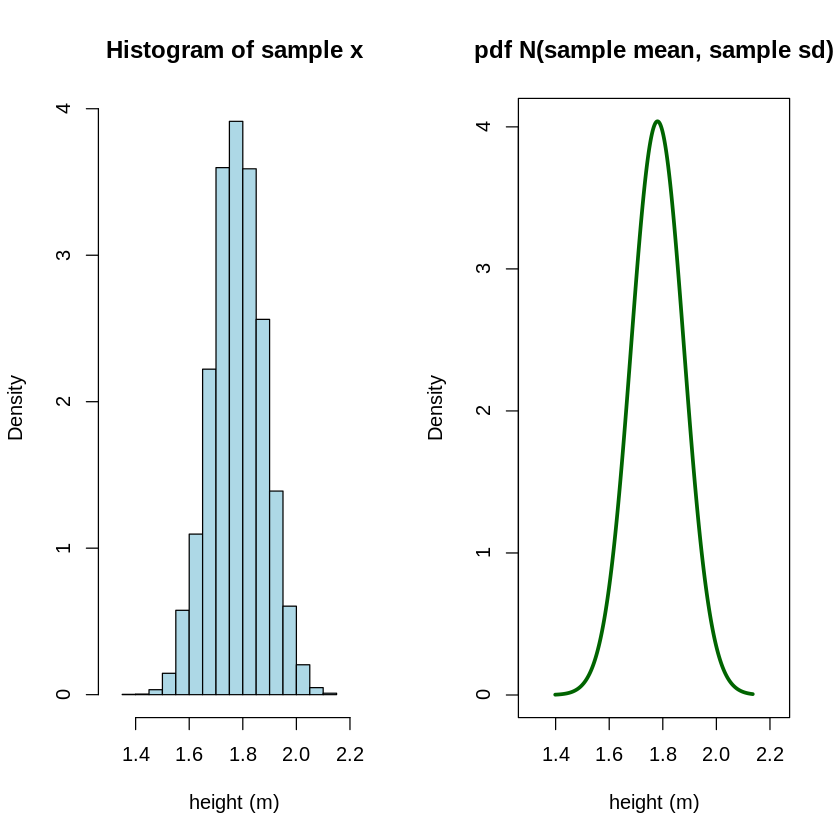

In [7]:
set.seed(3000)
mu <- 1.78
sigma <- 0.1
#::GMG::Generamos la muestra del tamaño indicado
deviates <- rnorm(n = 10000,mean = mu,sd = sigma)

#::GMG::Ponemos una matriz de 1x2 para poner las gráficas enparejadas horizontalmente
par(mfrow=c(1,2))
#::GMG::Graficamos el histograma de densidad de la muestra
h <- hist(x = deviates,
     freq = FALSE, 
     breaks = "Sturges",
     main = 'Histogram of sample x',
     col="lightblue",
     xlab='height (m)',
     xlim=c(min(deviates) - 0.1, max(deviates) + 0.1))

#::GMG::Calculamos la distribución normal con media y desviación típica muestral
#       sobre una secuencia con el mismo rango que la muestra generada
xseq <- seq(min(deviates),max(deviates),length=10001)
densities<-dnorm(xseq, mean(deviates),sd(deviates))

#::GMG::Graficamos la distribución normal
plot(xseq, 
     densities, 
     col="darkgreen",
     xlab="height (m)", ylab="Density", 
     type="l",lwd=3, 
     main="pdf N(sample mean, sample sd)",
     xlim=c(min(deviates) - 0.1, max(deviates) + 0.1)
    )

In [5]:
#::GMG::Para especificar los decimales que se visualizan del estadístico
specify_decimal <- function(x, k) trimws(format(round(x, k), nsmall=k))
paste('A size',length(deviates),'sample',' with sample mean:', specify_decimal(mean(deviates),5),
      'and sample variance:',specify_decimal(var(deviates),5),
      'and sample std dev.:',specify_decimal(sd(deviates),5))
paste('The distribution mean:',mu,
      'and the distribution variance:',sigma**2,
      'and finally, the distribution std. dev.:',sigma)

#::GMG::Vemos el objeto histograma generado por R 
#       del que hemos dibujado $density al poner Freq = FALSE
#h

[1] "A size 10000 sample  with sample mean: 1.78022 and sample variance: 0.00976 and sample std dev.: 0.09877"

[1] "The distribution mean: 1.78 and the distribution variance: 0.01 and finally, the istribution std. dev.: 0.1"

2.- Considerar la distribución de probabilidad anterior y la media muestral para una muestra de tamaño N (TN). Generar un número alto M = 10000 de muestras y estudiar la distribución (μ-TN), para N = 10, 100, 1000, 10000, 100000. Calcular el valor esperado en cada caso (considerando el valor esperado como el promedio a los M = 10000 psuedo-experimentos) y dibujar el resultado en función de N. Repetir el mismo procedimiento usando la varianza (considerando de nuevo las las M = 10000 pseudo-muestras).

In [9]:
#::GMG::Función para generar M muestras de tamaño T.n dispuestos en una matriz de MxT.n
muestras <- function(T.n = 10, M = 10000, m = 1.78, ds = 0.1) {
    return (matrix(data = rnorm(M*T.n,m,ds), 
                   nrow = M, 
                   ncol = T.n, 
                   byrow = TRUE)
           )
}


In [14]:
#::GMG::Generamos los diferentes "experimentos"
T.10 = muestras(T.n = 10)
T.100 = muestras(T.n = 100)
T.1000 = muestras(T.n = 1000)
#T.10000 = muestras(10000)
#T.100000 = muestras(100000)

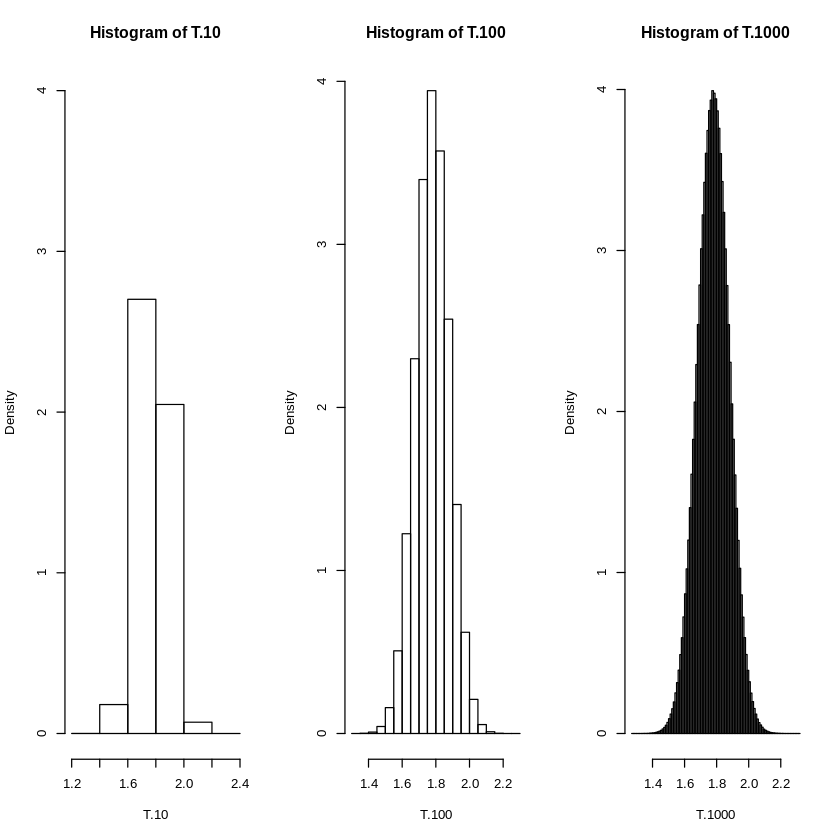

In [20]:
#http://seankross.com/notes/dpqr/
par(mfrow=c(1,3))
hist(T.10, 
     freq=FALSE,
     breaks = 5,
     ylim = c(0,4))
hist(T.100, 
     freq=FALSE, 
     breaks = 20)
hist(T.1000, 
     freq=FALSE, 
     breaks = 100)

In [16]:
#::GMG::La media muestral de cada experimento es una variable aleatoria de la que vamos a
#       disponer de 10000 valores
media.muestral.10 = apply (X = T.10,MARGIN = 1,FUN = mean)
#length(media.muestral.10)
#typeof(media.muestral.10)
media.muestral.100 = apply (X = T.100,MARGIN = 1,FUN = mean)
#length(media.muestral.100)
#typeof(media.muestral.100)
media.muestral.1000 = apply (X = T.1000,MARGIN = 1,FUN = mean)
#length(media.muestral.1000)
#typeof(media.muestral.1000)

[1] 10000

[1] "double"